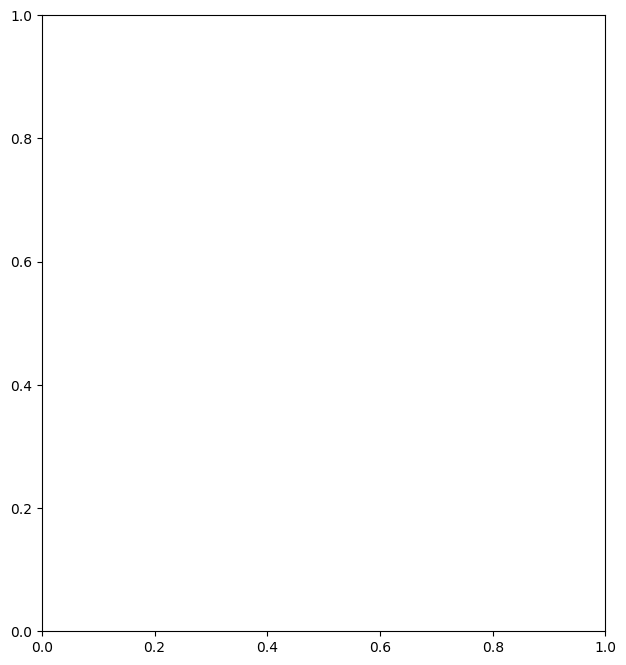

<class 'AttributeError'>: 'Line2D' object has no property 'Color'

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x_center = np.array([-1, 1])      # Center of data (mean)
x_center = np.diag(x_center)
sig = np.array([0.5, 2])   # Principal axes
sig = np.diag(sig)

theta = np.pi/3            # Rotate by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000
# Rotate, Stretch and smash, Center data
X = np.matmul(np.matmul(R, sig), np.random.randn(2,nPoints)) + np.matmul(x_center, np.ones((2,nPoints))) # Create 10,000 points

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-8, 7))
plt.ylim((-4, 7))

In [5]:
Xavg = np.mean(X,axis=1)                  # Compute mean (average, center of data)
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints)) # Rotation U, Stretch S
S = np.diag(S)

plt.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
plt.grid()
plt.xlim((-8, 7))
plt.ylim((-4, 7))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = np.matmul(np.matmul(U, S), np.array([np.cos(theta),np.sin(theta)])) # U * S * unit circle and it maps into the distribution

plt.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',LineWidth=3)
plt.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',LineWidth=3)
plt.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0,0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0,0]]),'-',color='cyan',LineWidth=4)
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1,1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1,1]]),'-',color='cyan',LineWidth=4)

plt.show()

<class 'NameError'>: name 'np' is not defined

In [6]:
- !wget https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
- !wget https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv

<class 'SyntaxError'>: invalid syntax (<ipython-input-6-aee473ab5784>, line 1)

In [2]:
!wget https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
!wget https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Load dataset
features = np.loadtxt('/content/ovariancancer_obs.csv', delimiter=',')

# Load labels (Cancer, Normal)
f = open('/content/ovariancancer_grp.csv', "r")
labels = f.read().split("\n")

# Compute Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(features, full_matrices=0)

fig1 = plt.figure(figsize=(16, 8))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='c') # We can see that 
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='r')

plt.show()

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [ ]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

# We take our first features (observation) matrix and project it
# in to the first 3 principal components.
# Take every patients genetic sequence and dot product it with
# the first three VT rows and get three numbers as the output
# We plot these 3 numbers
for j in range(features.shape[0]):
  x = np.matmul(VT[0, :], features[j, :].T)
  y = np.matmuk(VT[1, :], features[j, :].T)
  z = np.matmul(VT[2, :], features[j, :].T)

  if labels[j] == 'Cancer':
    ax.scatter(x, y, z, marker='x', color='r', s=50)
  else:
    ax.scatter(x, y, z, marker='o', color='b', s=50)

ax.view_init(25, 20)
plt.show()

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

images = fetch_olivetti_faces()

fig = plt.figure(figsize=(8, 6))
for i in range(4):
  ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
  ax.imshow(images.images[i], cmap=plt.cm.gray)

data = images.data

In [ ]:
# Scratch
U0, S0, VT0 = np.linalg.svd(data, full_matrices=0)

# Built-in function
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True)
pca.fit(data)

In [ ]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.semilogy(S0,'-o',color='k')

In [4]:
fig4 = plt.figure(figsize=(12, 8))
ax4 = fig4.add_subplot(111, projection='3d')

for i in range(len(data)):
  x = np.matmul(VT0[0, :], data[i])
  y = np.matmul(VT0[1, :], data[i])
  z = np.matmul(VT0[2, :], data[i])

  ax4.scatter(x, y, z, marker='x', c='r', s=50)

plt.show()

<class 'NameError'>: name 'plt' is not defined

In [3]:
fig = plt.figure(figsize=(16, 6))
for i in range(5):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(images.images[0].shape),
              cmap=plt.cm.gray)

<class 'NameError'>: name 'plt' is not defined